In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data=pd.read_csv('Fish.csv')

In [3]:
# five elements from top
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# five elements from the end
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
# any missing values
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
# description of the data
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
# information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

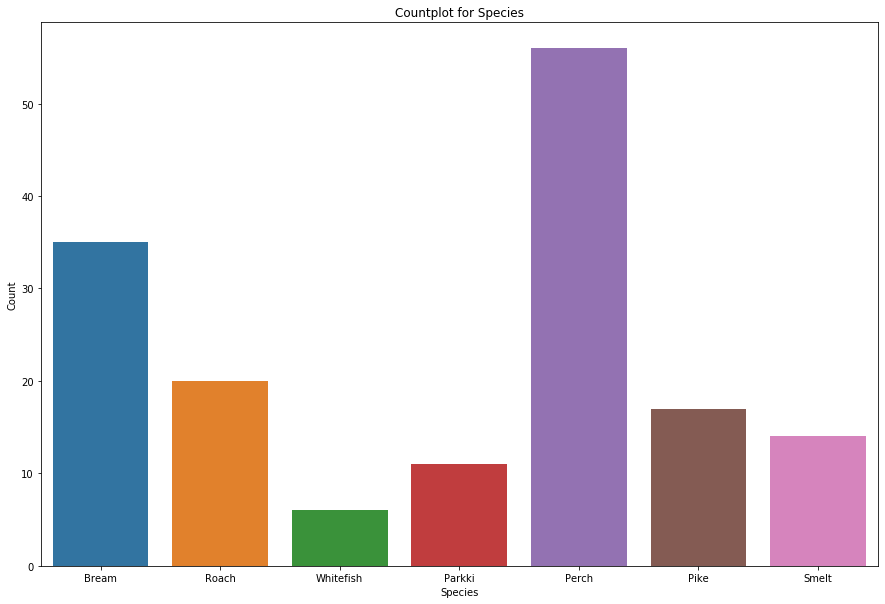

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(data['Species'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Countplot for Species')
plt.show()

**The dataset is highly imbalanced, as there are very less number of data points for whitefish.**

In [10]:
# creating the class numeric values
enc={'Bream':1,'Roach':2,'Whitefish':3,'Parkki':4,'Perch':5,'Pike':6,'Smelt':7}
data['Species']=data['Species'].map(enc)

In [11]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
y=data['Species']
x=data.drop('Species',axis=1)
print(y.shape,x.shape)

(159,) (159, 6)


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
col=list(x.columns)
x[col]=sc.fit_transform(x[col])
x.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371


In [14]:
from sklearn.model_selection import train_test_split as tts,GridSearchCV
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=12)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(127, 6) (127,)
(32, 6) (32,)


In [15]:
from sklearn.linear_model import LogisticRegression
param1={'C':[0.01,0.1,1,10,100]}
m1=GridSearchCV(LogisticRegression(max_iter=1000),param1,n_jobs=-1)
m1.fit(xtrain,ytrain)
print("Best parameter for the Logistic Regression Model is: ",m1.best_params_)
ypred=m1.predict(xtest)
print("The accuracy score was found to be: ",accuracy_score(ytest,ypred)*100)
print("The confusion matrix of the model is:\n",confusion_matrix(ytest,ypred))

Best parameter for the Logistic Regression Model is:  {'C': 100}
The accuracy score was found to be:  100.0
The confusion matrix of the model is:
 [[ 8  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  2]]


In [17]:
from sklearn.svm import SVC
param3={'C':[0.01,0.1,1,10,100]}
m3=GridSearchCV(SVC(),param3,n_jobs=-1)
m3.fit(xtrain,ytrain)
print("Best parameter for the model is: ",m3.best_params_)
ypred=m3.predict(xtest)
print("The accuracy score was found to be: ",accuracy_score(ytest,ypred)*100)
print("The confusion matrix of the model is:\n",confusion_matrix(ytest,ypred))

Best parameter for the model is:  {'C': 100}
The accuracy score was found to be:  100.0
The confusion matrix of the model is:
 [[ 8  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  2]]
